# Machine Learning

**Textbook is available @ [https://www.github.com/a-mhamdi/mlpy](https://www.github.com/a-mhamdi/mlpy)**

---


Artificial neural networks (ANN) are commonly used for classification tasks because they are able to learn complex relationships between the input features and the target class. They are particularly useful when the relationship is non-linear, as they are able to learn and model the inputs-outputs mapping using multiple hidden layers of interconnected neurons.

ANN are also able to handle large amounts of data and can learn from it without being explicitly programmed with a set of rules or a decision tree. This allows them to be very flexible and adaptable, and makes them well-suited for tasks that are difficult to define using traditional programming techniques.

## Binary Classification using ANN

There are several advantages to using neural networks for classification tasks:

1. They are able to learn complex relationships between the input features and the target class;
1. They are able to handle large amounts of data;
1. They can learn from unstructured data;
1. They are flexible and adaptable;
1. They can be trained to perform well on a wide range of classification tasks.

### Importing the libraries


In [1]:
import numpy as np
import pandas as pd

In [2]:
np.set_printoptions(precision=2)

### Importing the dataset


In [3]:
df = pd.read_csv("../Datasets/Churn_Modelling.csv")

In [4]:
df = df.dropna(how="any", axis=0) 

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
from random import sample

In [10]:
target = df.Exited
param = 7963 - 2037
records_to_drop = sample(list( target[ target==0 ].index ), param);
df.drop(records_to_drop, axis=0, inplace=True)

In [11]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

### Data preprocessing

In [12]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [13]:
oe = OrdinalEncoder()
ohe = OneHotEncoder()

In [14]:
from sklearn.compose import ColumnTransformer

In [15]:
ct = ColumnTransformer([("ohe", ohe, [1]), ("oe", oe, [2])], remainder='passthrough')

In [16]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(), [1]),
                                ('oe', OrdinalEncoder(), [2])])

In [17]:
X = ct.fit_transform(X)

In [18]:
X[:5]

array([[1.0, 0.0, 0.0, 0.0, 619, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [1.0, 0.0, 0.0, 0.0, 502, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [0.0, 0.0, 1.0, 1.0, 645, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [0.0, 1.0, 0.0, 0.0, 376, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [0.0, 1.0, 0.0, 1.0, 653, 58, 1, 132602.88, 1, 1, 0, 5097.67]],
      dtype=object)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=123, stratify=y)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
mms = MinMaxScaler()

In [23]:
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [24]:
print(X_train[:5, :])

[[1.   0.   0.   0.   0.95 0.42 0.   0.   0.   0.   0.   0.89]
 [0.   1.   0.   1.   0.5  0.24 0.3  0.54 0.33 1.   1.   0.2 ]
 [0.   1.   0.   0.   0.54 0.3  0.1  0.56 0.33 1.   1.   0.27]
 [1.   0.   0.   0.   0.55 0.36 0.3  0.29 0.   1.   0.   0.84]
 [1.   0.   0.   0.   0.56 0.27 0.3  0.   0.33 1.   1.   0.24]]


### Build the classifier `clf`

In [25]:
from keras.models import Sequential
from keras.layers import Input, Dense

2025-11-05 09:04:27.094735: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-05 09:04:27.116551: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
clf = Sequential()
ndim = X_train.shape[1]
clf.add(Input(shape=(ndim,)))
clf.add(Dense(units=16, activation='relu'))
clf.add(Dense(units=8, activation='relu'))
clf.add(Dense(units=4, activation='relu'))
clf.add(Dense(units=1, activation='sigmoid'))

### Insights about `clf`

In [27]:
from keras.utils import plot_model

In [28]:
plot_model(clf, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [29]:
clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

### Compile `clf`

In [30]:
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

In [31]:
opt = Adam(learning_rate=.01)

In [32]:
import tensorflow as tf
tf.keras.metrics.Precision

keras.src.metrics.confusion_metrics.Precision

In [33]:
clf.compile(optimizer=opt, 
            loss=binary_crossentropy, 
            metrics=['Accuracy', 'Precision', 'Recall'])

### Train and evaluate `clf`

In [34]:
classifier_history = clf.fit (X_train, y_train, validation_split=.1, batch_size=32, epochs=32);

Epoch 1/32
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Accuracy: 0.5786 - Precision: 0.5681 - Recall: 0.6911 - loss: 0.6778 - val_Accuracy: 0.6595 - val_Precision: 0.6349 - val_Recall: 0.7407 - val_loss: 0.6175
Epoch 2/32
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.6727 - Precision: 0.6738 - Recall: 0.6801 - loss: 0.6078 - val_Accuracy: 0.7147 - val_Precision: 0.7347 - val_Recall: 0.6667 - val_loss: 0.5807
Epoch 3/32
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7056 - Precision: 0.7229 - Recall: 0.6949 - loss: 0.5884 - val_Accuracy: 0.7393 - val_Precision: 0.7770 - val_Recall: 0.6667 - val_loss: 0.5267
Epoch 4/32
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7339 - Precision: 0.7474 - Recall: 0.7325 - loss: 0.5291 - val_Accuracy: 0.7270 - val_Precision: 0.7086 - val_Recall: 0.7654 - val_loss: 0.5252
Epoch 5/32
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7533 - Precision: 0.7439 - Recall: 0.7634 - loss: 0.5115 - val_Accuracy: 0.7546 - val_Precision: 0.8203 

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [36]:
y_pred = clf.predict(X_test)
y_pred = ( y_pred > .5 ).astype(int)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Print the confusion matrix

In [37]:
cm = confusion_matrix(y_test, y_pred)

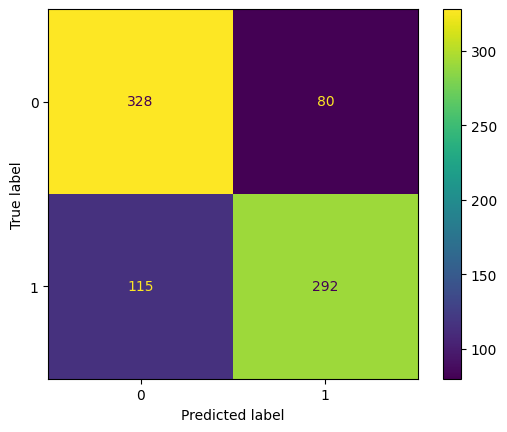

In [38]:
ConfusionMatrixDisplay(cm).plot();

In [39]:
print(y_test.shape)

(815,)


In [40]:
print(y_pred.shape)
y_pred = y_pred.reshape(len(y_pred),)
print(y_pred.shape)

(815, 1)
(815,)


In [41]:
pd.crosstab(y_test, y_pred, rownames=["Expected"], colnames=["Predicted"], margins=True)

Predicted,0,1,All
Expected,,,
0,328,80,408
1,115,292,407
All,443,372,815


In [42]:
y_test = y_test.reshape(len(y_test), 1)
y_pred = y_pred.reshape(len(y_pred), 1)
print(np.concatenate((y_test[:10], y_pred[:10]), axis=1))

[[1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       408
           1       0.78      0.72      0.75       407

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815



In [45]:
metrics = list(classifier_history.history.keys())
metrics

['Accuracy',
 'Precision',
 'Recall',
 'loss',
 'val_Accuracy',
 'val_Precision',
 'val_Recall',
 'val_loss']

In [46]:
import matplotlib.pyplot as plt

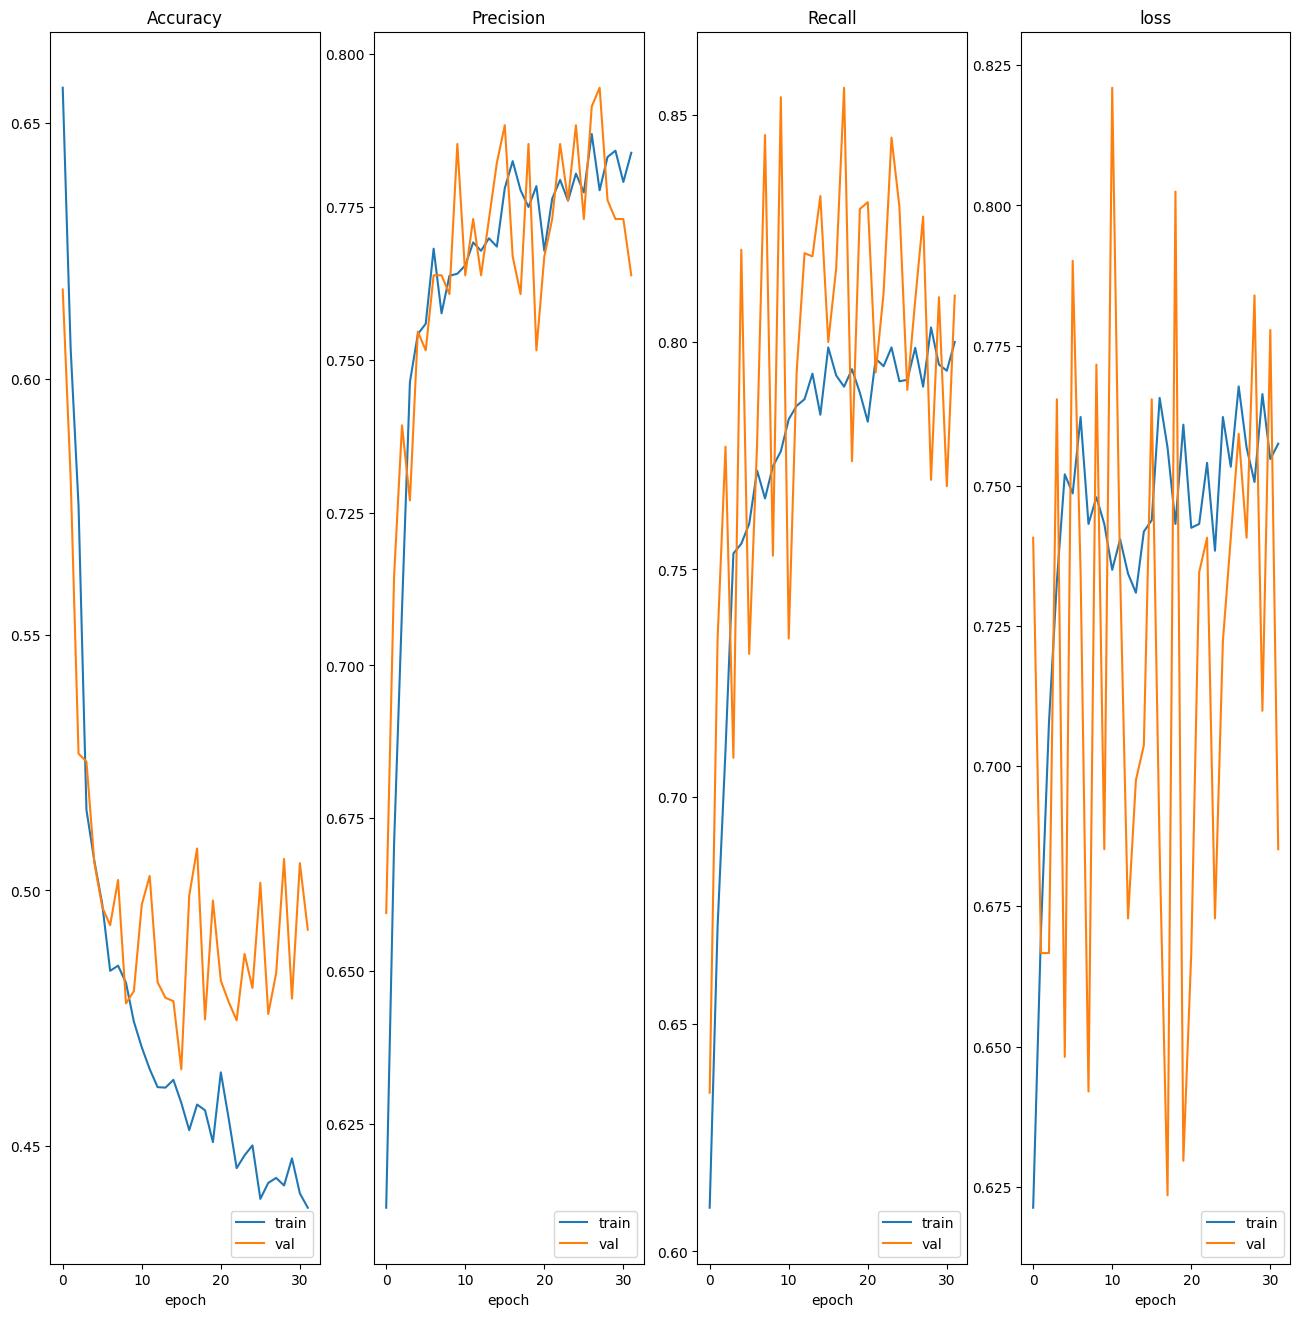

In [48]:
fig, axs = plt.subplots(1, 4)
plt.rc('figure', figsize=(16, 16))

axs[0].plot(classifier_history.history['loss'])
axs[0].plot(classifier_history.history['val_loss'])

axs[1].plot(classifier_history.history['Accuracy'])
axs[1].plot(classifier_history.history['val_Accuracy'])

axs[2].plot(classifier_history.history['Precision'])
axs[2].plot(classifier_history.history['val_Precision'])

axs[3].plot(classifier_history.history['Recall'])
axs[3].plot(classifier_history.history['val_Recall'])

for idx, metric in enumerate(metrics[:4]):
    ax = axs[idx]
    ax.legend(['train', 'val'], loc='lower right')
    ax.set_title(metric)
    ax.set_xlabel('epoch')

It is important to note that neural networks can be more computationally intensive to train and may require more data and more time to achieve better performance compared to some other classification algorithms. Furthermore, because they discover patterns in the data using the network's weights and biases rather than explicit rules, they may be more challenging to read and comprehend.